# Analyzing Subreddits for Ubisoft Internal Matters
In this section, we will analyze various subreddits to gather insights and discussions related to Ubisoft's internal company culture, company policies, support, customer service, and management practices. This analysis will help us understand the public perception and employee experiences associated with Ubisoft.

Subreddits focused:
<ol>
<li>gaming</li>
<li>pcgaming</li>
<li>videogames</li>
<li>Ubisoft</li>
<li>assassinscreed</li>
<li>Rainbow6</li>
<li>farcry</li>
</ol>


# Part 1: Import libraries

In [18]:
import praw
import pandas as pd
import numpy as np
import datetime as dt
import csv
import pickle

# topic modelling 
import re    # regular expression
import nltk     # natural language processing
from nltk.corpus import stopwords    # stop words

from wordcloud import WordCloud    # word cloud
from sklearn.feature_extraction.text import CountVectorizer    # count vectorizer       
from sklearn.decomposition import LatentDirichletAllocation as LDA # LDA   
from praw.models import MoreComments, Redditor

# sentiment analysis
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# plotting tools
import pyLDAvis     # topic modelling visualization
import pyLDAvis.lda_model   # topic modelling visualization
import seaborn as sns   # visualization
import matplotlib.pyplot as plt  # visualization
%matplotlib inline  

import os 
import sys
# from dotenv import load_dotenv

# Part 2: Data Collection 
- Collecting data that mentions Ubisoft and the different keywords related to internal company matters across the various subreddits we are trying to surf from
- Adding prerequisites for the data being collected
    - Post must have more than 10 comments to be considered "engaging"
    - Posts will be limited to 1000 posts per subreddits per keyword

In [2]:
# bring in env variables 
load_dotenv()

CLIENT_ID = os.getenv("CLIENT_ID")
CLIENT_SECRET = os.getenv("CLIENT_SECRET")
USER_AGENT = os.getenv("USER_AGENT")
USERNAME = os.getenv("USERNAME")
PASSWORD = os.getenv("PASSWORD")

print("Env variables loaded")

Env variables loaded


In [3]:
# initialise connection with reddit
reddit = praw.Reddit(client_id=CLIENT_ID, 
                     client_secret=CLIENT_SECRET, 
                     user_agent=USER_AGENT, 
                     username=USERNAME, 
                     password=PASSWORD)

## Scraping 7 subreddits for 11 keywords related to Ubisoft internal matters

In [4]:
total_count = 0
topic_dict = {
    "id":[],
    "author": [],
    "created": [],
    "title":[],
    "score":[],
    "comms_num": [],
    "body":[],
    "url":[]
}
subreddits = ['gaming', 'pcgaming', 'videogames', 'Ubisoft', 'assassinscreed', 'Rainbow6', 'farcry']

# Define the keywords you want to search for
keywords = ['company culture', 'support', 'customer service', 'manage', 'employees', 'workplace', 'work environment', 'management', 'leadership', 'ethics', 'values']

# Loop over each subreddit
for subreddit_name in subreddits:
    subreddit = reddit.subreddit(subreddit_name)
    print(f"##### Searching subreddit: {subreddit_name} #####")
    
    # Loop over each keyword
    for keyword in keywords:
        print(f"##### Searching for posts mentioning: '{keyword}' and 'Ubisoft' #####")
        post_count = 0

        for submission in subreddit.search(keyword, limit=1000, sort='top'):
            # Check if 'Ubisoft' is mentioned in the title or body of the post
            if 'ubisoft' in submission.title.lower() or 'ubisoft' in submission.selftext.lower():
                
                # Add the post to the dictionary
                topic_dict["id"].append(submission.id)
                topic_dict["author"].append(submission.author)
                topic_dict["created"].append(submission.created)
                topic_dict["title"].append(submission.title)
                topic_dict["score"].append(submission.score)
                topic_dict["comms_num"].append(submission.num_comments)
                topic_dict["body"].append(submission.selftext)
                topic_dict["url"].append(submission.url)

                post_count += 1
                total_count += 1
                print(f"Added {post_count} post mentioning keyword {keyword}" )

print("Data collection complete.There are a total of ", total_count, " posts collected.")

##### Searching subreddit: gaming #####
##### Searching for posts mentioning: 'company culture' and 'Ubisoft' #####
Added 1 post mentioning keyword company culture
Added 2 post mentioning keyword company culture
Added 3 post mentioning keyword company culture
Added 4 post mentioning keyword company culture
Added 5 post mentioning keyword company culture
Added 6 post mentioning keyword company culture
Added 7 post mentioning keyword company culture
Added 8 post mentioning keyword company culture
Added 9 post mentioning keyword company culture
Added 10 post mentioning keyword company culture
Added 11 post mentioning keyword company culture
Added 12 post mentioning keyword company culture
Added 13 post mentioning keyword company culture
Added 14 post mentioning keyword company culture
##### Searching for posts mentioning: 'support' and 'Ubisoft' #####
Added 1 post mentioning keyword support
Added 2 post mentioning keyword support
Added 3 post mentioning keyword support
Added 4 post mentio

In [5]:
submission_posts = pd.DataFrame(topic_dict)  
submission_posts

id           author       created  \
0      9tyqnu        deflaimun  1.541287e+09   
1      19vmt7         xylotism  1.362700e+09   
2      6knp0r    Dudeman_Jones  1.498924e+09   
3      gv9n9n           zeoxzy  1.591113e+09   
4      1gbpvv          Hamakua  1.371194e+09   
...       ...              ...           ...   
2343   usfei3  BeardInTheNorth  1.652887e+09   
2344   q57hym      JosephStall  1.633870e+09   
2345   87z5b3           yeew21  1.522306e+09   
2346   48j4jc           InVizO  1.456873e+09   
2347  1eiyini      RioluButGun  1.722675e+09   

                                                  title  score  comms_num  \
0      China is re-shaping entertainment as we know it.     16          7   
1     SimCity 5 a disappointment, gamers have had it...      9         11   
2        Victory Lap: E3 from the eyes of a first timer      9          4   
3                                  Game company profits      7          3   
4     DRM and Microsoft's Xbox One (Undisclosed) int...      5         12   
...                                                 ...    ...        ...   
2343  Far Cry Anthology bundle is on sale for $50 ag...      0          1   
2344                     Ubisoft has a creative problem      0         35   
2345  It shouldn't be too hard to patch the enemy re...      0         10   
2346                    Even at $0 Game is not Worth It      0          6   
2347  Hot Take: Far Cry 5 is extremely overrated and...      0         31   

                                                   body  \
0     Companies are changing their IPs in every way ...   
1     Quoted from Metacritic user OrcTownOrc:\n\n>EA...   
2     The following article is a travelogue based on...   
3     Hi guys, this is more of a brain dump and unli...   
4     * If Microsoft is trying to adopt Steam's Busi...   
...                                                 ...   
2343  $50 for Far Cry 3C, 4, 5, and 6 seems like a g...   
2344  For anyone that’s played Ubisoft games in the ...   
2345  Just change the value. Until then I will not b...   
2346  I'm a pretty upset Farcry fan right now.\n\nI ...   
2347  This is going to be a little bit of a rant but...   

                                                    url  
0     https://www.reddit.com/r/gaming/comments/9tyqn...  
1     https://www.reddit.com/r/gaming/comments/19vmt...  
2     https://www.reddit.com/r/gaming/comments/6knp0...  
3     https://www.reddit.com/r/gaming/comments/gv9n9...  
4     https://www.reddit.com/r/gaming/comments/1gbpv...  
...                                                 ...  
2343  https://www.reddit.com/r/farcry/comments/usfei...  
2344  https://www.reddit.com/r/farcry/comments/q57hy...  
2345  https://www.reddit.com/r/farcry/comments/87z5b...  
2346  https://www.reddit.com/r/farcry/comments/48j4j...  
2347  https://www.reddit.com/r/farcry/comments/1eiyi...  

[2348 rows x 8 columns]

In [31]:
# Filter the DataFrame to drop rows where comms_num is below 10
engaging_submission_posts = submission_posts[submission_posts['comms_num'] >= 10]

# Display the updated DataFrame
engaging_submission_posts

id           author       created  \
1      19vmt7         xylotism  1.362700e+09   
4      1gbpvv          Hamakua  1.371194e+09   
5      k3bcr2         Vitaro99  1.606664e+09   
6      i9stov        YourQuirk  1.597434e+09   
10     nszwpt  Voidbearer2kn17  1.622912e+09   
...       ...              ...           ...   
2331   hr1wf2     AndyToskovic  1.594735e+09   
2333   8ar8j8      MiksteR_RdY  1.523207e+09   
2344   q57hym      JosephStall  1.633870e+09   
2345   87z5b3           yeew21  1.522306e+09   
2347  1eiyini      RioluButGun  1.722675e+09   

                                                  title  score  comms_num  \
1     SimCity 5 a disappointment, gamers have had it...      9         11   
4     DRM and Microsoft's Xbox One (Undisclosed) int...      5         12   
5     I noticed that AAA games are not quite popular...      5         13   
6     What companies do we know are really shitty to...      3         48   
10                Shattering the illusion of AAA gaming      0         23   
...                                                 ...    ...        ...   
2331  Things I hope Far Cry 6 will change compared t...      5         14   
2333  How Far Cry 5 is not the optimized game the be...      5         15   
2344                     Ubisoft has a creative problem      0         35   
2345  It shouldn't be too hard to patch the enemy re...      0         10   
2347  Hot Take: Far Cry 5 is extremely overrated and...      0         31   

                                                   body  \
1     Quoted from Metacritic user OrcTownOrc:\n\n>EA...   
4     * If Microsoft is trying to adopt Steam's Busi...   
5     As a russian I want to share with you my exper...   
6     (This is a post about real life **workplace cu...   
10    I have noticed that the 'quality' of AAA gamin...   
...                                                 ...   
2331  1) Skill system: bring back the xp system wher...   
2333  So I'm running:\n\n- GTX 1080 AMP!\n- i7 6700k...   
2344  For anyone that’s played Ubisoft games in the ...   
2345  Just change the value. Until then I will not b...   
2347  This is going to be a little bit of a rant but...   

                                                    url  
1     https://www.reddit.com/r/gaming/comments/19vmt...  
4     https://www.reddit.com/r/gaming/comments/1gbpv...  
5     https://www.reddit.com/r/gaming/comments/k3bcr...  
6     https://www.reddit.com/r/gaming/comments/i9sto...  
10    https://www.reddit.com/r/gaming/comments/nszwp...  
...                                                 ...  
2331  https://www.reddit.com/r/farcry/comments/hr1wf...  
2333  https://www.reddit.com/r/farcry/comments/8ar8j...  
2344  https://www.reddit.com/r/farcry/comments/q57hy...  
2345  https://www.reddit.com/r/farcry/comments/87z5b...  
2347  https://www.reddit.com/r/farcry/comments/1eiyi...  

[1416 rows x 8 columns]

In [32]:
# Arrange the engaging_submission_posts by the number of comments in descending order
engaging_submission_posts_sorted = engaging_submission_posts.sort_values(by='comms_num', ascending=False)

# Display the sorted DataFrame
engaging_submission_posts_sorted

id              author       created  \
1200   jr6gvi   WhiteWolfWhispers  1.604956e+09   
921    jr6gvi   WhiteWolfWhispers  1.604956e+09   
69     6pmx25   LinksGayAwakening  1.501061e+09   
977    jqzgf3      Ghost_LeaderBG  1.604935e+09   
20     8pvcna             Loffeno  1.528574e+09   
...       ...                 ...           ...   
1392   dp0ps4  i-got-a-jar-of-rum  1.572403e+09   
180    nuozbc         Maxwell_DMs  1.623104e+09   
2274   qeeup4    SupermanAteMyDog  1.635027e+09   
2281   tzqrxp             xPETEZx  1.649502e+09   
1932  1fgzl4k   CryAltruistic6398  1.726358e+09   

                                                  title  score  comms_num  \
1200  Assassin's Creed Valhalla General Discussion [...    640      10335   
921   Assassin's Creed Valhalla General Discussion [...    640      10335   
69    Do you play Playerunknown's Battlegrounds? JUS...  24382       3154   
977   Assassin's Creed Valhalla Tech Support Megathread    149       2676   
20                        EA's E3 Conference Break Down  27300       2394   
...                                                 ...    ...        ...   
1392  As much as I love Assassin’s Creed 3, I really...      0         10   
180   It's been 1 week since I bought Assassin's Cre...     47         10   
2274      I can't believe how bad the respawning is....     23         10   
2281                        FC6 - DLC - No saving sucks     17         10   
1932                            Ubisoft support is BAD.      2         10   

                                                   body  \
1200  It's time for the release of Assassin's Creed ...   
921   It's time for the release of Assassin's Creed ...   
69    #**EDIT:**\n\nAnyone who uses the tweeter, can...   
977   As with any video game, after the launch of As...   
20    **EA's E3 Conference June 9th, 2018**\n\n**BFV...   
...                                                 ...   
1392  My main gripe is that he’s portrayed in too ne...   
180   I have been in contact with both the Ubisoft s...   
2274  I genuinely thought people were exaggerating b...   
2281  I just purchased the FC6 season pass, and been...   
1932  Just wanna come on here to tell everyone about...   

                                                    url  
1200  https://www.reddit.com/r/assassinscreed/commen...  
921   https://www.reddit.com/r/assassinscreed/commen...  
69    https://www.reddit.com/r/pcgaming/comments/6pm...  
977   https://www.reddit.com/r/assassinscreed/commen...  
20    https://www.reddit.com/r/gaming/comments/8pvcn...  
...                                                 ...  
1392  https://www.reddit.com/r/assassinscreed/commen...  
180   https://www.reddit.com/r/ubisoft/comments/nuoz...  
2274  https://www.reddit.com/r/farcry/comments/qeeup...  
2281  https://www.reddit.com/r/farcry/comments/tzqrx...  
1932  https://www.reddit.com/r/Rainbow6/comments/1fg...  

[1416 rows x 8 columns]

In [33]:
'''
Fixing the date column

Reddit uses UNIX timestamps to format date and time. 
Instead of manually converting all those entries, or using a site like 
www.unixtimestamp.com, we can easily write up a function in Python to automate that process.

We define it, call it, and join the new column to dataset with the following code:
'''

def get_date(created):
    return dt.datetime.fromtimestamp(created)

_timestamp = engaging_submission_posts["created"].apply(get_date)

engaging_submission_posts = engaging_submission_posts.assign(timestamp = _timestamp)

In [34]:
# save posts to csv
engaging_submission_posts.to_csv('reddit_ubisoft_internal_posts.csv', index=False)

In [35]:
# Convert the dataframe back into a dictionary
engaging_submission_posts_dict = engaging_submission_posts.to_dict(orient='list')
print(engaging_submission_posts_dict)

{'id': ['19vmt7', '1gbpvv', 'k3bcr2', 'i9stov', 'nszwpt', 'ox9hrf', 'sx4slf', '1fsbl57', '19cy9vf', '8q686s', '8qkjil', 'wg71g', 'wi985', '8pvcna', '7a5ijr', 'ir5z9', 'jnd02', 'bfz6a', 'zexgk', '1aezbo', '2tlejw', 'wlhkl', '7i6k47', '87t8oi', 'w1sbie', '8qeby3', '1fpt84x', '1dqw6kn', '9am3b', '1aedem', 'i9stov', 'uejjks', 'q3hm53', 'oucmva', 'r7gc4h', 'ox9hrf', 'jnd02', '4ycpfq', 'w5i6ke', 'q1opx2', 'w1sbie', '8qeby3', '1fpt84x', '2jt5k4', '18xpq41', 'b3lav', '7cscli', '622z4a', '164lfei', '192ovim', 'nm1kgg', '29fl0x', '140qajt', 'be88c0', '6pmx25', 'b3g0ne', 'bcbaoj', 'jtadjs', 'jlhg3l', 'co7pby', 'nm1kgg', 'aaiore', '7atzyr', 'avu5ob', '5pbfpv', '4shvju', '163pdgc', 'nyfej3', 'co7pby', 'aaiore', 'mqgagt', '20hx3k', 'bcbaoj', 'co7pby', 'wab595', '13dttdr', '7fnpay', 'gu9cpo', '20hx3k', '171j11a', '9mqb1m', '10eiv3h', '1gbu969', 'rivx7m', '1drczzm', 'sq4vxs', 'rl2qsf', '17q5v3q', 'bhbbmh', '7uce9w', 'kh8mab', '7unski', '5m9um2', '87ufkf', 'qbu0hw', 'bcbaoj', 'co7pby', 'wab595', '13dtt

In [36]:
# checking frequency of author posting
author_counts = engaging_submission_posts['author'].value_counts()
author_counts.head(30)

author
Ghost_LeaderBG          33
domvgt                  31
LordKeren               31
nstav13                 30
jeypiti                 27
VestigialLlama4         25
Kentukkis               12
Turul9                  11
ChankaNewsNetwork       10
iwascuddles              9
WhiteWolfWhispers        9
Turbostrider27           7
FinnsterMac              6
Ahmed_Anubis             6
Comprehensive_Part42     6
Lord_Antheron            6
RinoTheBouncer           6
MrFriendism              6
0K4M1                    6
Loffeno                  5
Aftermath1231            5
Darth_Samuel             5
ReportPlayer             5
englishbutter            4
PePe_0_5aP0              4
N3mus                    4
SparkedSynapse           4
PTBR                     4
Pitiful-Hamster-3062     4
p0hs                     4
Name: count, dtype: int64

### Looking for influential Redditor based on total comments under their posts

In [37]:
# Convert Redditor objects to their usernames
engaging_submission_posts['author'] = engaging_submission_posts['author'].apply(lambda x: x.name if isinstance(x, Redditor) else x)

# Check the first few rows of the DataFrame
print("engaging_submission_posts head:\n", engaging_submission_posts.head())

engaging_submission_posts head:
         id           author       created  \
1   19vmt7         xylotism  1.362700e+09   
4   1gbpvv          Hamakua  1.371194e+09   
5   k3bcr2         Vitaro99  1.606664e+09   
6   i9stov        YourQuirk  1.597434e+09   
10  nszwpt  Voidbearer2kn17  1.622912e+09   

                                                title  score  comms_num  \
1   SimCity 5 a disappointment, gamers have had it...      9         11   
4   DRM and Microsoft's Xbox One (Undisclosed) int...      5         12   
5   I noticed that AAA games are not quite popular...      5         13   
6   What companies do we know are really shitty to...      3         48   
10              Shattering the illusion of AAA gaming      0         23   

                                                 body  \
1   Quoted from Metacritic user OrcTownOrc:\n\n>EA...   
4   * If Microsoft is trying to adopt Steam's Busi...   
5   As a russian I want to share with you my exper...   
6   (This is a po

In [38]:
# Filter authors with more than 4 counts
authors_with_more_than_4_counts = author_counts[author_counts > 4].index

# Check the filtered authors
print("Authors with more than 4 counts:\n", authors_with_more_than_4_counts)

Authors with more than 4 counts:
 Index([      Ghost_LeaderBG,               domvgt,            LordKeren,
                    nstav13,              jeypiti,      VestigialLlama4,
                  Kentukkis,               Turul9,    ChankaNewsNetwork,
                iwascuddles,    WhiteWolfWhispers,       Turbostrider27,
                FinnsterMac,         Ahmed_Anubis, Comprehensive_Part42,
              Lord_Antheron,       RinoTheBouncer,          MrFriendism,
                      0K4M1,              Loffeno,        Aftermath1231,
               Darth_Samuel,         ReportPlayer],
      dtype='object', name='author')


In [27]:
# Filter posts by authors with more than 4 counts
filtered_posts = engaging_submission_posts[engaging_submission_posts['author'].isin(authors_with_more_than_4_counts)]

# Check the filtered posts
print("Filtered posts head:\n", filtered_posts.head())
print("Filtered posts unique authors:\n", filtered_posts['author'].unique())


Filtered posts head:
         id   author       created                                     title  \
16  8q686s  Loffeno  1.528686e+09       Bethesda's E3 Conference Break Down   
17  8qkjil  Loffeno  1.528822e+09  Ninendo's E3 Press Conference Break Down   
20  8pvcna  Loffeno  1.528574e+09             EA's E3 Conference Break Down   
32  8qeby3  Loffeno  1.528762e+09        PC Gaming E3 Conference Break Down   
53  8qeby3  Loffeno  1.528762e+09        PC Gaming E3 Conference Break Down   

    score  comms_num                                               body  \
16   5594        833  **Bethesda's E3 Conference June 10th, 2018**\n...   
17   5116        788  **Nintendo's E3 Conference June 12th, 2018**\n...   
20  27300       2394  **EA's E3 Conference June 9th, 2018**\n\n**BFV...   
32   5216        376  **PC Gaming E3 June 11th, 2018**\n\n**Satisfac...   
53   5211        376  **PC Gaming E3 June 11th, 2018**\n\n**Satisfac...   

                                                  ur

In [39]:
# Group by author and calculate the total sum of comms_num
author_comms_sum = filtered_posts.groupby('author')['comms_num'].sum().reset_index()

# Rename the columns for clarity
author_comms_sum.columns = ['author', 'total_comms_num']

# Sort the authors by total_comms_num in descending order
author_comms_sum_sorted = author_comms_sum.sort_values(by='total_comms_num', ascending=False)
author_comms_sum_sorted

author  total_comms_num
18     WhiteWolfWhispers            22213
19                domvgt            17995
7         Ghost_LeaderBG            17437
21               jeypiti             9258
10             LordKeren             6712
9                Loffeno             4767
22               nstav13             2547
16                Turul9             1454
15        Turbostrider27             1436
11         Lord_Antheron             1281
3      ChankaNewsNetwork             1204
17       VestigialLlama4              978
13          ReportPlayer              825
12           MrFriendism              732
20           iwascuddles              517
14        RinoTheBouncer              513
6            FinnsterMac              492
5           Darth_Samuel              465
1          Aftermath1231              447
8              Kentukkis              406
4   Comprehensive_Part42              222
2           Ahmed_Anubis              176
0                  0K4M1              114

## Scraping comments under the 1414 engaging posts

In [40]:
import time
from prawcore.exceptions import NotFound, TooManyRequests

# Initialize a dictionary to store comments
comments_dict = {
    "post_id": [],
    "comment_id": [],
    "author": [],
    "created": [],
    "body": [],
    "score": []
}

# Loop through each post to get comments
for post_id in engaging_submission_posts_dict["id"]:
    try:
        submission = reddit.submission(id=post_id)      # Get the post
        submission.comments.replace_more(limit=100)    # Get top 100 comments

        for comment in submission.comments.list():
            comments_dict["post_id"].append(post_id)
            comments_dict["comment_id"].append(comment.id)
            comments_dict["author"].append(comment.author)
            comments_dict["created"].append(comment.created)
            comments_dict["body"].append(comment.body)
            comments_dict["score"].append(comment.score)
    
    # Add a delay to avoid hitting the rate limit
        time.sleep(2)  # Adjust the delay as needed
    except NotFound:
        print(f"Post with ID {post_id} not found. Skipping...")
    except TooManyRequests:
        print("Rate limit exceeded. Waiting for 60 seconds...")
        time.sleep(60)  # Wait for 60 seconds before retrying

In [41]:
# Create a DataFrame from the comments dictionary
comments_data = pd.DataFrame(comments_dict)
comments_data

post_id comment_id         author       created  \
0        19vmt7    c8rp089       xylotism  1.362701e+09   
1        19vmt7    c8rpasf           None  1.362702e+09   
2        19vmt7    c8rr3rv           None  1.362707e+09   
3        19vmt7    c8rvihx     Geoffvster  1.362721e+09   
4        19vmt7    c8rpjsq       xylotism  1.362702e+09   
...         ...        ...            ...           ...   
223234  1eiyini    lg9xxpr           None  1.722677e+09   
223235  1eiyini    lgbqktz          wrel_  1.722705e+09   
223236  1eiyini    lgbr6b7  Lord_Antheron  1.722705e+09   
223237  1eiyini    lgbsql8          wrel_  1.722706e+09   
223238  1eiyini    lgbsuyc  Lord_Antheron  1.722706e+09   

                                                     body  score  
0       TL;DR -- This review from Jonathan Cresswell a...      2  
1       Until people stop buying their products, it wi...      2  
2       EA's entire MO has been rather distasteful for...      1  
3       I agree with everything you've said, but I hop...      0  
4       I like how they recently "reworded" their "all...      1  
...                                                   ...    ...  
223234                                          [removed]      2  
223235  >“Large minority” is an oxymoron.\n\nNo it isn...      1  
223236  ~~Really, that’s the only part you focused on?...      2  
223237  It's the part I focused on because it was my p...      0  
223238                          … Okay that’s a fair cop.      2  

[223239 rows x 6 columns]

In [42]:
# Save comments_data to a CSV file
comments_data.to_csv('comments_data.csv', index=False)
print("Comments data saved to comments_data.csv")

Comments data saved to comments_data.csv


In [43]:
# Drop rows where author is None
filtered_comments_data = comments_data.dropna(subset=['author'])

# Display the filtered DataFrame
filtered_comments_data

post_id comment_id         author       created  \
0        19vmt7    c8rp089       xylotism  1.362701e+09   
3        19vmt7    c8rvihx     Geoffvster  1.362721e+09   
4        19vmt7    c8rpjsq       xylotism  1.362702e+09   
8        19vmt7    c8rxx0m        Jimm607  1.362734e+09   
9        19vmt7    c8rppw4       xylotism  1.362703e+09   
...         ...        ...            ...           ...   
223233  1eiyini    lgbop55  Lord_Antheron  1.722705e+09   
223235  1eiyini    lgbqktz          wrel_  1.722705e+09   
223236  1eiyini    lgbr6b7  Lord_Antheron  1.722705e+09   
223237  1eiyini    lgbsql8          wrel_  1.722706e+09   
223238  1eiyini    lgbsuyc  Lord_Antheron  1.722706e+09   

                                                     body  score  
0       TL;DR -- This review from Jonathan Cresswell a...      2  
3       I agree with everything you've said, but I hop...      0  
4       I like how they recently "reworded" their "all...      1  
8       What theyve done with maxis in general makes m...      1  
9       I absolutely love the new Tomb Raider game tha...      1  
...                                                   ...    ...  
223233  “Large minority” is an oxymoron. The last post...      3  
223235  >“Large minority” is an oxymoron.\n\nNo it isn...      1  
223236  ~~Really, that’s the only part you focused on?...      2  
223237  It's the part I focused on because it was my p...      0  
223238                          … Okay that’s a fair cop.      2  

[191480 rows x 6 columns]

In [44]:
# Sort the comments_data DataFrame by score in descending order
sorted_comments_data = filtered_comments_data.sort_values(by='score', ascending=False)

# Display the top 50 comments
sorted_comments_data

post_id comment_id           author       created  \
170     1fsbl57    lpjal28   Strategist9101  1.727637e+09   
169     1fsbl57    lpjbqxy    Every-Slice59  1.727637e+09   
7147     8pvcna    e0ec173         Skinnder  1.528575e+09   
8007     8pvcna    e0ec6tb          Loffeno  1.528575e+09   
7146     8pvcna    e0edvba  OmegamattReally  1.528577e+09   
...         ...        ...              ...           ...   
165444  1877bd1    kbdb79y       XenoDrobot  1.701323e+09   
165013   6q9zgo    dkvujiu    CephalonVezir  1.501334e+09   
139600  1ea3e9m    lej224m       SamMerlini  1.721735e+09   
68296   1ea3e9m    lej224m       SamMerlini  1.721735e+09   
165362  1877bd1    kbcoj1u       XenoDrobot  1.701312e+09   

                                                     body  score  
170     Even the Ubisoft launcher can't believe you'd ...  14305  
169     Back when I bought FarCry3  Uplay didn't want ...   9959  
7147    Are you also planning on doing the same for Be...   9155  
8007    I want to try and do this for all the conferen...   9025  
7146    >New Command & Conquer title\n\n\*starts hyper...   6965  
...                                                   ...    ...  
165444  > siege has one of the quickest battle passes ...   -151  
165013  Jesus christ really? Fucking hell I thought th...   -182  
139600  Japanese people are angry about Lockley's atte...   -282  
68296   Japanese people are angry about Lockley's atte...   -283  
165362  especially since Siege’s battlepass takes *for...   -330  

[191480 rows x 6 columns]

In [45]:
# Check for duplicates in the comment_id column
duplicate_comment_ids = sorted_comments_data[sorted_comments_data.duplicated('comment_id', keep=False)]

# Display the number of duplicate comment_ids
num_duplicates = duplicate_comment_ids.shape[0]
print(f"Number of duplicate comment_ids: {num_duplicates}")

# Display the duplicate comment_ids
duplicate_comment_ids

Number of duplicate comment_ids: 98046


post_id comment_id             author       created  \
10154    w1sbie    igmpk2d  KennyImmortalized  1.658144e+09   
12723    w1sbie    igmpk2d  KennyImmortalized  1.658144e+09   
33580    aaiore    ecshtoq      QuackChampion  1.546071e+09   
29336    aaiore    ecshtoq      QuackChampion  1.546071e+09   
33030    co7pby    ewgmsbn   LongFluffyDragon  1.565385e+09   
...         ...        ...                ...           ...   
169980   8pk1q1    e0c3om4   75milliongenders  1.528476e+09   
29228    nm1kgg    gzm69jx         daviejambo  1.622105e+09   
17201    nm1kgg    gzm69jx         daviejambo  1.622105e+09   
139600  1ea3e9m    lej224m         SamMerlini  1.721735e+09   
68296   1ea3e9m    lej224m         SamMerlini  1.721735e+09   

                                                     body  score  
10154   But proceeds to do messed up things to their f...   4867  
12723   But proceeds to do messed up things to their f...   4864  
33580   I'm glad he's addressing the point about Epic'...   2822  
29336   I'm glad he's addressing the point about Epic'...   2821  
33030   >  I received this message from one of the mod...   2356  
...                                                   ...    ...  
169980                         He’s always been balanced     -72  
29228   No but you can steal an iphone , just like how...    -73  
17201   No but you can steal an iphone , just like how...    -76  
139600  Japanese people are angry about Lockley's atte...   -282  
68296   Japanese people are angry about Lockley's atte...   -283  

[98046 rows x 6 columns]

In [46]:
# Drop duplicate comment_id and keep only the first occurrence
unique_comments = sorted_comments_data.drop_duplicates(subset='comment_id', keep='first')

# Display the updated DataFrame
unique_comments

post_id comment_id           author       created  \
170     1fsbl57    lpjal28   Strategist9101  1.727637e+09   
169     1fsbl57    lpjbqxy    Every-Slice59  1.727637e+09   
7147     8pvcna    e0ec173         Skinnder  1.528575e+09   
8007     8pvcna    e0ec6tb          Loffeno  1.528575e+09   
7146     8pvcna    e0edvba  OmegamattReally  1.528577e+09   
...         ...        ...              ...           ...   
154981   y4rsce    isghpt5        BetaFuchs  1.665865e+09   
165444  1877bd1    kbdb79y       XenoDrobot  1.701323e+09   
165013   6q9zgo    dkvujiu    CephalonVezir  1.501334e+09   
139600  1ea3e9m    lej224m       SamMerlini  1.721735e+09   
165362  1877bd1    kbcoj1u       XenoDrobot  1.701312e+09   

                                                     body  score  
170     Even the Ubisoft launcher can't believe you'd ...  14305  
169     Back when I bought FarCry3  Uplay didn't want ...   9959  
7147    Are you also planning on doing the same for Be...   9155  
8007    I want to try and do this for all the conferen...   9025  
7146    >New Command & Conquer title\n\n\*starts hyper...   6965  
...                                                   ...    ...  
154981  It doesn't really help if you have to ban some...   -105  
165444  > siege has one of the quickest battle passes ...   -151  
165013  Jesus christ really? Fucking hell I thought th...   -182  
139600  Japanese people are angry about Lockley's atte...   -282  
165362  especially since Siege’s battlepass takes *for...   -330  

[136990 rows x 6 columns]

In [47]:
# Save unique comments to a CSV file
unique_comments.to_csv('unique_comments.csv', index=False)
print("Unique comments saved to unique_comments.csv")

Unique comments saved to unique_comments.csv


# Part 3: Topic Modelling

In [4]:
# read comments file
comments = pd.read_csv('unique_comments.csv')
comments

post_id comment_id           author       created  \
0       1fsbl57    lpjal28   Strategist9101  1.727637e+09   
1       1fsbl57    lpjbqxy    Every-Slice59  1.727637e+09   
2        8pvcna    e0ec173         Skinnder  1.528575e+09   
3        8pvcna    e0ec6tb          Loffeno  1.528575e+09   
4        8pvcna    e0edvba  OmegamattReally  1.528577e+09   
...         ...        ...              ...           ...   
136985   y4rsce    isghpt5        BetaFuchs  1.665865e+09   
136986  1877bd1    kbdb79y       XenoDrobot  1.701323e+09   
136987   6q9zgo    dkvujiu    CephalonVezir  1.501334e+09   
136988  1ea3e9m    lej224m       SamMerlini  1.721735e+09   
136989  1877bd1    kbcoj1u       XenoDrobot  1.701312e+09   

                                                     body  score  
0       Even the Ubisoft launcher can't believe you'd ...  14305  
1       Back when I bought FarCry3  Uplay didn't want ...   9959  
2       Are you also planning on doing the same for Be...   9155  
3       I want to try and do this for all the conferen...   9025  
4       >New Command & Conquer title\n\n\*starts hyper...   6965  
...                                                   ...    ...  
136985  It doesn't really help if you have to ban some...   -105  
136986  > siege has one of the quickest battle passes ...   -151  
136987  Jesus christ really? Fucking hell I thought th...   -182  
136988  Japanese people are angry about Lockley's atte...   -282  
136989  especially since Siege’s battlepass takes *for...   -330  

[136990 rows x 6 columns]

In [12]:
comments['body'] = comments['body'].astype(str)
print(comments['body'].dtype)

object


In [13]:
from nltk.stem import PorterStemmer
from nltk import pos_tag, word_tokenize

# Initialize the stemmer
stemmer = PorterStemmer()

# Function to stem and filter words based on POS tagging
def stem_and_filter(text):
    # Tokenize the text
    words = word_tokenize(text)
    
    # Perform POS tagging
    pos_tags = pos_tag(words)
    
    # Filter words that are not nouns, adjectives, or proper nouns
    filtered_words = [word for word, pos in pos_tags if pos in ['NN', 'NNS', 'NNP', 'NNPS', 'JJ', 'JJR', 'JJS']]
    
    # Stem the filtered words
    stemmed_words = [stemmer.stem(word) for word in filtered_words]
    
    return ' '.join(stemmed_words)

# remove punctuation
comments['body'] =  comments['body'].map(lambda x: re.sub('[,/.!?*]', '', x))

# convert to lowercase
comments['body'] = comments['body'].map(lambda x: x.lower())

# Apply the function to the 'body' column
comments['body'] = comments['body'].apply(stem_and_filter)

# Display the updated dataframe
comments.head()

post_id comment_id           author       created  \
0  1fsbl57    lpjal28   Strategist9101  1.727637e+09   
1  1fsbl57    lpjbqxy    Every-Slice59  1.727637e+09   
2   8pvcna    e0ec173         Skinnder  1.528575e+09   
3   8pvcna    e0ec6tb          Loffeno  1.528575e+09   
4   8pvcna    e0edvba  OmegamattReally  1.528577e+09   

                                                body  score  
0                      ubisoft launcher ubisoft game  14305  
1                             i farcry3 uplay game i   9959  
2        same bethesda cuz im interest i dont ill ir   9155  
3  i confer devolv pc edit ok i pc more reveal ye...   9025  
4  > new command conquer titl hyperventilating\ >...   6965

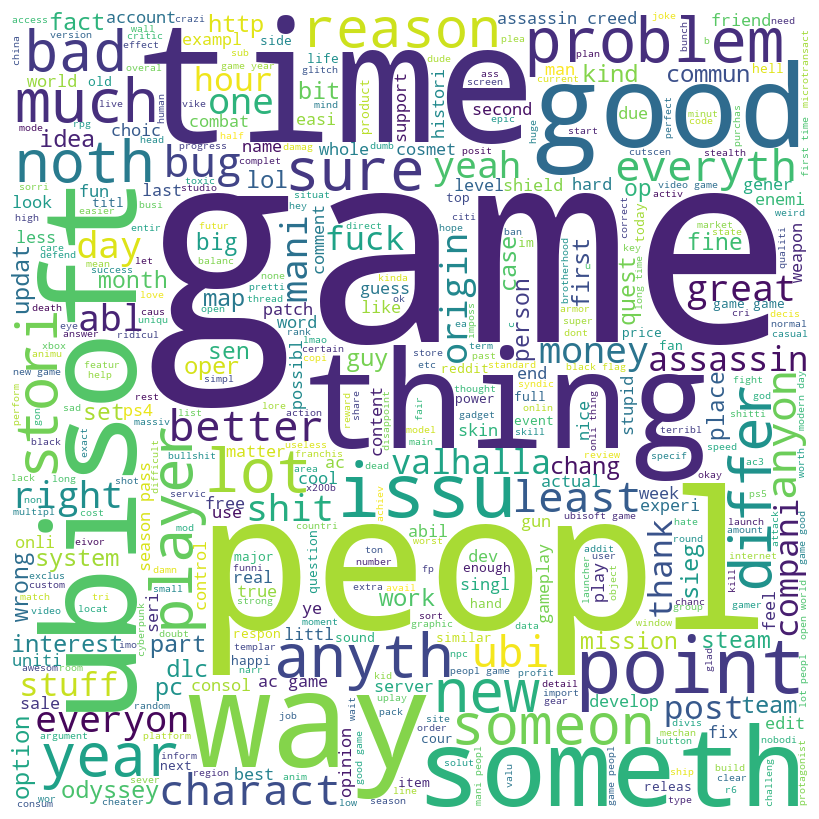

In [14]:
# word cloud 

# join all the text in the body column
text = ' '.join(comments['body'])

# create a word cloud object
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                max_words = 1000,
                contour_width = 3, 
                contour_color = 'steelblue',
                stopwords = set(stopwords.words('english')), 
                min_font_size = 10).generate(text)  

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

# visuazlize the word cloud
wordcloud.to_file('wordcloud_internal_comments.png')


C:\Users\school\AppData\Local\Temp\ipykernel_7092\1793986905.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=x_pos, y=counts, palette='husl')


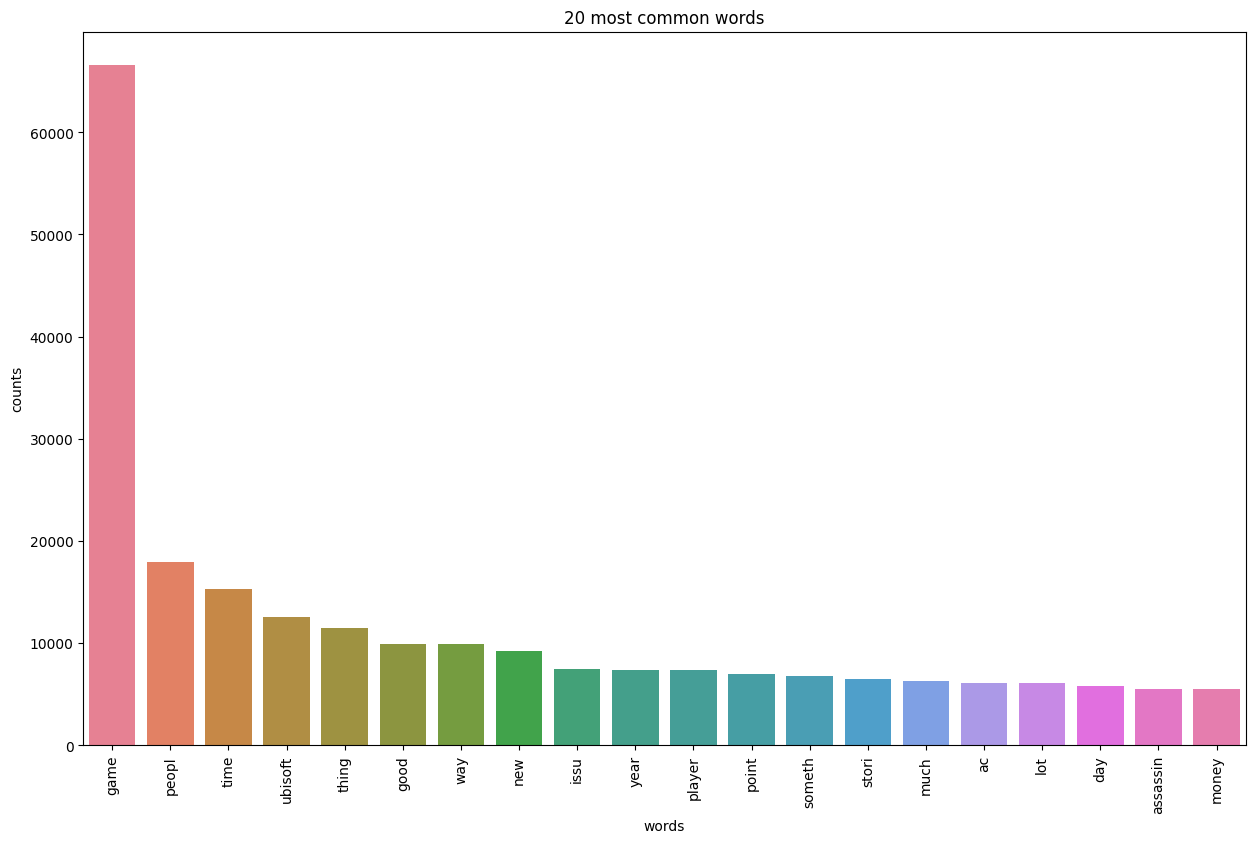

In [15]:
# Helper function
def plot_20_most_common_words(count_data, count_vectorizer):
    words = count_vectorizer.get_feature_names_out()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts += t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x: x[1], reverse=True)[0:20]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='20 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x=x_pos, y=counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words=stopwords.words('english'))

# Fit and transform the processed body text
count_data = count_vectorizer.fit_transform(comments['body'])

# Visualise the 20 most common words
plot_20_most_common_words(count_data, count_vectorizer)

In [20]:
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

# Tweak the two parameters below (use int values below 15)
number_topics = 10
number_words = 10

# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
game money year ubisoft peopl steam good compani time new

Topic #1:
ubisoft account thank support post reddit comment http pass ubi

Topic #2:
charact peopl game black femal histori real choic histor male

Topic #3:
time yeah game ac thing first new differ sure set

Topic #4:
day game peopl modern work fuck http thing cheat way

Topic #5:
game peopl thing point system good way bad someth player

Topic #6:
game bug issu hour pc time anyon patch updat quest

Topic #7:
shield enemi level weapon armor damag skill abil attack shot

Topic #8:
game assassin stori ac odyssey origin creed valhalla quest world

Topic #9:
oper player new game map season op team sieg skin


In [21]:
# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(number_topics))

try:
    with open(LDAvis_data_filepath, 'rb') as f:
        LDAvis_prepared = pickle.load(f)
except FileNotFoundError:
    print(f"File not found: {LDAvis_data_filepath}. Preparing data instead.")
    LDAvis_prepared = pyLDAvis.lda_model.prepare(lda, count_data, count_vectorizer)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# Save the visualization as HTML
pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(number_topics) +'.html')

LDAvis_prepared

File not found: ./ldavis_prepared_10. Preparing data instead.


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.115731  0.005605       1        1  17.100541
8     -0.105855 -0.161953       2        1  12.400472
6     -0.116012  0.085385       3        1  11.746471
9      0.015083  0.133376       4        1  11.169682
5      0.067031 -0.028586       5        1  10.979761
1      0.168200  0.144349       6        1   9.749888
2     -0.003849 -0.177374       7        1   7.790768
7     -0.231427  0.114088       8        1   7.272387
3      0.001023 -0.042756       9        1   6.263358
4      0.090076 -0.072133      10        1   5.526671, topic_info=           Term          Freq         Total Category  logprob  loglift
16097      game  64362.000000  64362.000000  Default  30.0000  30.0000
3918   assassin   5552.000000   5552.000000  Default  29.0000  29.0000
10404       day   5633.000000   5633.000000  Default  28.0000  28.0000
28144      oper   4306.000000   4306.000000  Default  27.0000  27.0000
7660    charact   5169.000000   5169.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
39831      time    439.877532  14893.152225  Topic10  -5.3485  -0.6266
17118      good    363.441503   9679.812874  Topic10  -5.5393  -0.3866
24314      mani    321.321460   4564.620342  Topic10  -5.6625   0.2419
8724    compani    308.613238   3878.350718  Topic10  -5.7029   0.3645
7660    charact    289.469812   5169.409718  Topic10  -5.7669   0.0131

[795 rows x 6 columns], token_table=       Topic      Freq              Term
term                                    
773        5  0.960134               3rd
1733       1  0.982061               aaa
1733       5  0.013220               aaa
1733      10  0.003777               aaa
1807       1  0.002548              abil
...      ...       ...               ...
46225     10  0.013580              year
46285      3  0.028186               yep
46285      8  0.969585               yep
46502      6  0.974878  youtubecomwatchv
46746      3  0.995362              yule

[2648 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 9, 7, 10, 6, 2, 3, 8, 4, 5])

# Part 4: Sentiment Analysis

In [ ]:
dict_tagged_sentences = ''
# Below indicates the relative path to
# positive/negative/inverter/incrementer/decrementer files
DICTIONARY_DIR_PREFIX = 'dicts2/'

In [ ]:
class Splitter(object):
    def __init__(self):
        self.nltk_splitter = nltk.data.load('tokenizers/punkt/english.pickle')
        self.nltk_tokenizer = nltk.tokenize.TreebankWordTokenizer()

    def split(self, text):
        """
        input format: a paragraph of text
        output format: a list of lists of words.
            e.g.: [['this', 'is', 'a', 'sentence'], ['this', 'is', 'another', 'one']]
        """
        sentences = self.nltk_splitter.tokenize(text)
        tokenized_sentences = [self.nltk_tokenizer.tokenize(sent) for sent in sentences]
        return tokenized_sentences


In [ ]:
class POSTagger(object):
    def __init__(self):
        pass

    def pos_tag(self, sentences):
        """
        input format: list of lists of words
            e.g.: [['this', 'is', 'a', 'sentence'], ['this', 'is', 'another', 'one']]
        output format: list of lists of tagged tokens. Each tagged tokens has a
        form, a lemma, and a list of tags
            e.g: [[('this', 'this', ['DT']), ('is', 'be', ['VB']), ('a', 'a', ['DT']), ('sentence', 'sentence', ['NN'])],
                    [('this', 'this', ['DT']), ('is', 'be', ['VB']), ('another', 'another', ['DT']), ('one', 'one', ['CARD'])]]
        """

        pos = [nltk.pos_tag(sentence) for sentence in sentences]
        #adapt format
        pos = [[(word, word, [postag]) for (word, postag) in sentence] for sentence in pos]
        return pos


In [ ]:
class DictionaryTagger(object):
    def __init__(self, dictionary_paths):
        """

        :rtype : object
        """
        files = [open(path, 'r') for path in dictionary_paths]
        dictionaries = [yaml.full_load(dict_file) for dict_file in files]
        map(lambda x: x.close(), files)
        self.dictionary = {}
        self.max_key_size = 0
        for curr_dict in dictionaries:
            for key in curr_dict:
                if key in self.dictionary:
                    self.dictionary[key].extend(curr_dict[key])
                else:
                    self.dictionary[key] = curr_dict[key]
                    self.max_key_size = max(self.max_key_size, len(key))

    def tag(self, postagged_sentences):
        return [self.tag_sentence(sentence) for sentence in postagged_sentences]

    def tag_sentence(self, sentence, tag_with_lemmas=False):
        """
        the result is only one tagging of all the possible ones.
        The resulting tagging is determined by these two priority rules:
            - longest matches have higher priority
            - search is made from left to right
        """
        tag_sentence = []
        N = len(sentence)
        if self.max_key_size == 0:
            self.max_key_size = N
        i = 0
        while (i < N):
            j = min(i + self.max_key_size, N) #avoid overflow
            tagged = False
            while (j > i):
                expression_form = ' '.join([word[0] for word in sentence[i:j]]).lower()
                expression_lemma = ' '.join([word[1] for word in sentence[i:j]]).lower()
                if tag_with_lemmas:
                    literal = expression_lemma
                else:
                    literal = expression_form
                if literal in self.dictionary:
                    #self.logger.debug("found: %s" % literal)
                    is_single_token = j - i == 1
                    original_position = i
                    i = j
                    taggings = [tag for tag in self.dictionary[literal]]
                    tagged_expression = (expression_form, expression_lemma, taggings)
                    if is_single_token: #if the tagged literal is a single token, conserve its previous taggings:
                        original_token_tagging = sentence[original_position][2]
                        tagged_expression[2].extend(original_token_tagging)
                    tag_sentence.append(tagged_expression)
                    tagged = True
                else:
                    j = j - 1
            if not tagged:
                tag_sentence.append(sentence[i])
                i += 1
        return tag_sentence

In [ ]:
def value_of(sentiment):
    if sentiment == 'positive1': return 1
    if sentiment == 'positive2': return 2
    if sentiment == 'positive3': return 3
    if sentiment == 'negative1': return -1
    if sentiment == 'negative2': return -2
    if sentiment == 'negative3': return -3
    return 0

def sentiment_score(review):
    return sum ([value_of(tag) for sentence in dict_tagged_sentences for token in sentence for tag in token[2]])

def sentence_score(sentence_tokens, previous_token, acum_score):
    if not sentence_tokens:
        return acum_score
    else:
        current_token = sentence_tokens[0]
        tags = current_token[2]
        token_score = sum([value_of(tag) for tag in tags])
        if previous_token is not None:
            previous_tags = previous_token[2]
            if 'inc' in previous_tags:
                token_score *= 2.0
            elif 'dec' in previous_tags:
                token_score /= 2.0
            elif 'inv' in previous_tags:
                token_score *= -1.0
        return sentence_score(sentence_tokens[1:], current_token, acum_score + token_score)

def sentiment_score(sentences):
    return sum([sentence_score(sentence, None, 0.0) for sentence in sentences])

In [ ]:
def run_analysis(text):
    splitter = Splitter() # Split a long single string into sentences.
    postagger = POSTagger() # Part-Of-Speech tagger.

    # If text contains multiple sentences, this line splits it into individual sentences.
    splitted_sentences = splitter.split(text)
    print (splitted_sentences)
    #exit(1)

    print ("########## This performs Part-Of-Speech tagging. ##########")
    # This performs Part-Of-Speech tagging.
    pos_tagged_sentences = postagger.pos_tag(splitted_sentences)
    pprint (pos_tagged_sentences)
    #exit(1)

    print ("########## This line loads Positive word and Negative word corpus. ##########")
    # This line loads Positive word and Negative word dictionaries.
    dicttagger = DictionaryTagger([ DICTIONARY_DIR_PREFIX + 'positive.yml', DICTIONARY_DIR_PREFIX + 'negative.yml'])
    dict_tagged_sentences = dicttagger.tag(pos_tagged_sentences)
    pprint(dict_tagged_sentences)
    #exit(1)

    print ("########## [Baseline Analysis] Using only Positive/Negative corpus. ##########")
    score = sentiment_score(dict_tagged_sentences)
    print ("Score: %d" % score)
    #exit(1)

    print ("########## This line loads Positve/Negative corpus + incrementer/decrementer corpus. ##########")
    dicttagger = DictionaryTagger([ DICTIONARY_DIR_PREFIX + 'positive.yml', DICTIONARY_DIR_PREFIX + 'negative.yml', DICTIONARY_DIR_PREFIX + 'inc.yml', DICTIONARY_DIR_PREFIX + 'dec.yml'])
    dict_tagged_sentences = dicttagger.tag(pos_tagged_sentences)
    pprint(dict_tagged_sentences)
    score = sentiment_score(dict_tagged_sentences)
    print ("Score: %d" % score)
    #exit(1)
